In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


# Loading data

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

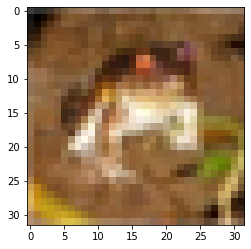

In [6]:
plt.imshow(x_train[0])

# Scaling Data

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train / 255

In [9]:
x_test = x_test / 255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# Setting up categorical variable

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train, 10)

In [14]:
y_cat_test = to_categorical(y_test, 10)

In [15]:
y_train[0]

array([6], dtype=uint8)

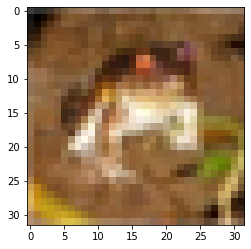

In [16]:
plt.imshow(x_train[0])

In [17]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Creating model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [23]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 39s 6ms/step - loss: 1.4912 - accuracy: 0.4624 - val_loss: 1.2310 - val_accuracy: 0.5594
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1665 - accuracy: 0.5868 - val_loss: 1.1283 - val_accuracy: 0.6006
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0197 - accuracy: 0.6446 - val_loss: 1.0090 - val_accuracy: 0.6437
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9078 - accuracy: 0.6829 - val_loss: 0.9855 - val_accuracy: 0.6600
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8187 - accuracy: 0.7145 - val_loss: 0.9795 - val_accuracy: 0.6660
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7392 - accuracy: 0.7423 - val_loss: 0.9506 - val_accuracy: 0.6803
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6673 - accuracy: 0.7694 - val_loss: 1.0670 - val_accur

# Evaluating Model

In [24]:
metrics = pd.DataFrame(model.history.history)

In [25]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.491227,0.46236,1.231042,0.5594
1,1.166479,0.58680,1.128344,0.6006
2,1.019748,0.64456,1.009010,0.6437
3,0.907768,0.68288,0.985548,0.6600
4,0.818696,0.71446,0.979528,0.6660
5,0.739230,0.74232,0.950594,0.6803
6,0.667274,0.76938,1.066984,0.6502
7,0.601362,0.78886,1.007985,0.6737


In [26]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

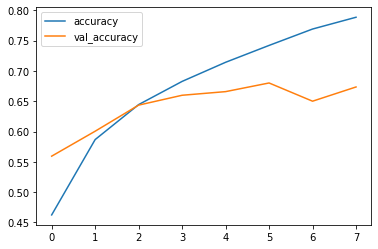

In [27]:
metrics[["accuracy", "val_accuracy"]].plot()

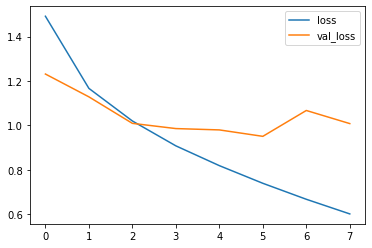

In [28]:
metrics[["loss", "val_loss"]].plot()

In [29]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0079847574234009, 0.6736999750137329]

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1000
           1       0.90      0.72      0.80      1000
           2       0.58      0.56      0.57      1000
           3       0.47      0.52      0.50      1000
           4       0.64      0.62      0.63      1000
           5       0.51      0.61      0.56      1000
           6       0.79      0.71      0.75      1000
           7       0.70      0.75      0.72      1000
           8       0.76      0.81      0.79      1000
           9       0.73      0.79      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000



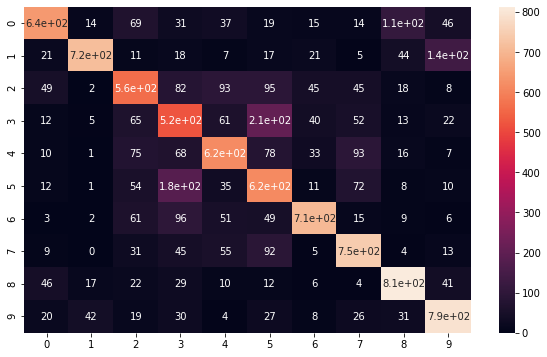

In [33]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [34]:
my_image = x_test[0]

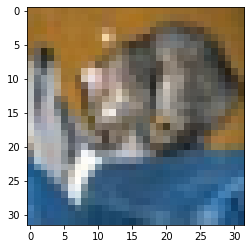

In [35]:
plt.imshow(my_image)

In [36]:
y_test[0]

array([3], dtype=uint8)

In [37]:
model.predict_classes(my_image.reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3])